In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
import urllib
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

1. Measures of Similarity and Dissimilarity

1. Calculate the Euclidean distance between two points.

Пусть даны два вектора $x = [x_1,x_2,...,x_n]$ и $y = [y_1,y_2,...,y_n]$:

$D_{euclidean} = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + ... + (x_n-y_n)^2}$

In [2]:
# 1 method
x_a = np.array([11, 12, 13])
y_a = np.array([13, 12, 11])
euclidean_distance = np.linalg.norm(x_a - y_a)
print(f"Euclidian distance between {x_a} и {y_a}: {euclidean_distance}")

# 2 method
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

distance = euclidean_distance(x_a, y_a)
print("Euclidean distance:", distance)

Euclidian distance between [11 12 13] и [13 12 11]: 2.8284271247461903
Euclidean distance: 2.8284271247461903


2. Find the Jaccard similarity between two sets

In [18]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 5, 6])

set_x = set(x)
set_y = set(y)

intersection = len(set_x.intersection(set_y))
union = len(set_x.union(set_y))

jaccard_similarity = intersection / union
print(f"Jaccard Similarity: {jaccard_similarity:.2f}")

Jaccard Similarity: 0.33


3. Compute the Cosine similarity and Correlation between two numeric vectors.

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

correlation = np.corrcoef(a, b)[0, 1]

print("Cosine Similarity:", cosine_similarity)
print("Correlation:", correlation)

Cosine Similarity: 0.9746318461970762
Correlation: 1.0


2. Dimensionality Reduction (PCA)

In [5]:
df = pd.read_csv("train (1).csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=["Id"], errors="ignore")
numeric_df = numeric_df.fillna(numeric_df.mean())

numeric_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
numeric_df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

cov_matrix = np.cov(scaled_data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

top_2_vectors = eigenvectors[:, :2]

reduced_data = scaled_data.dot(top_2_vectors)

In [10]:
print("Feature Standardization Complete")
print(f"Mean after standardization: {np.mean(scaled_data, axis=0)[:5]}")  
print(f"Std after standardization: {np.std(scaled_data, axis=0)[:5]}")  

Feature Standardization Complete
Mean after standardization: [-8.45594523e-17  4.07588727e-16 -5.84007728e-17  1.38701835e-16
  3.54054685e-16]
Std after standardization: [1. 1. 1. 1. 1.]


In [11]:
print("Covariance matrix")
print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"Sample of covariance matrix (first 3x3):\n{cov_matrix[:3, :3]}")

Covariance matrix
Covariance matrix shape: (37, 37)
Sample of covariance matrix (first 3x3):
[[ 1.0006854  -0.3573006  -0.13987689]
 [-0.3573006   1.0006854   0.30700488]
 [-0.13987689  0.30700488  1.0006854 ]]


In [12]:
print("Eigenvalues and Eigenvectors Found")
print(f"Top 5 eigenvalues: {eigenvalues[:5]}")
print(f"Variance explained by top 2 components: {np.sum(eigenvalues[:2]) / np.sum(eigenvalues):.3f}")

Eigenvalues and Eigenvectors Found
Top 5 eigenvalues: [7.9091255  3.20874356 2.57725775 2.02717987 1.49148846]
Variance explained by top 2 components: 0.300


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

print("PCA Applied and Data Reduced to 2 Components")
print(f"Reduced data shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.3f}")

PCA Applied and Data Reduced to 2 Components
Reduced data shape: (1460, 2)
Explained variance ratio: [0.21361374 0.0866634 ]
Total variance explained: 0.300


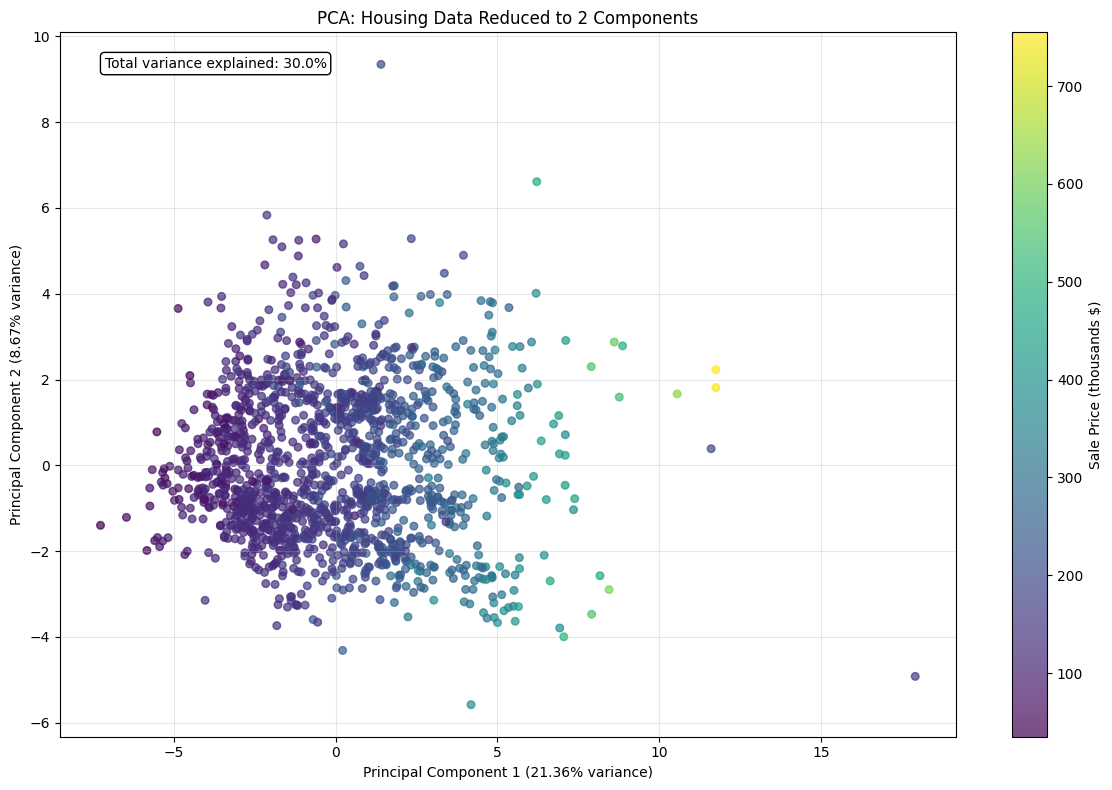

In [15]:
plt.figure(figsize=(12, 8))

colors = df['SalePrice'] / 1000 

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, label='Sale Price (thousands $)')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: Housing Data Reduced to 2 Components')
plt.grid(True, alpha=0.3)

plt.text(0.05, 0.95, f'Total variance explained: {np.sum(pca.explained_variance_ratio_):.1%}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

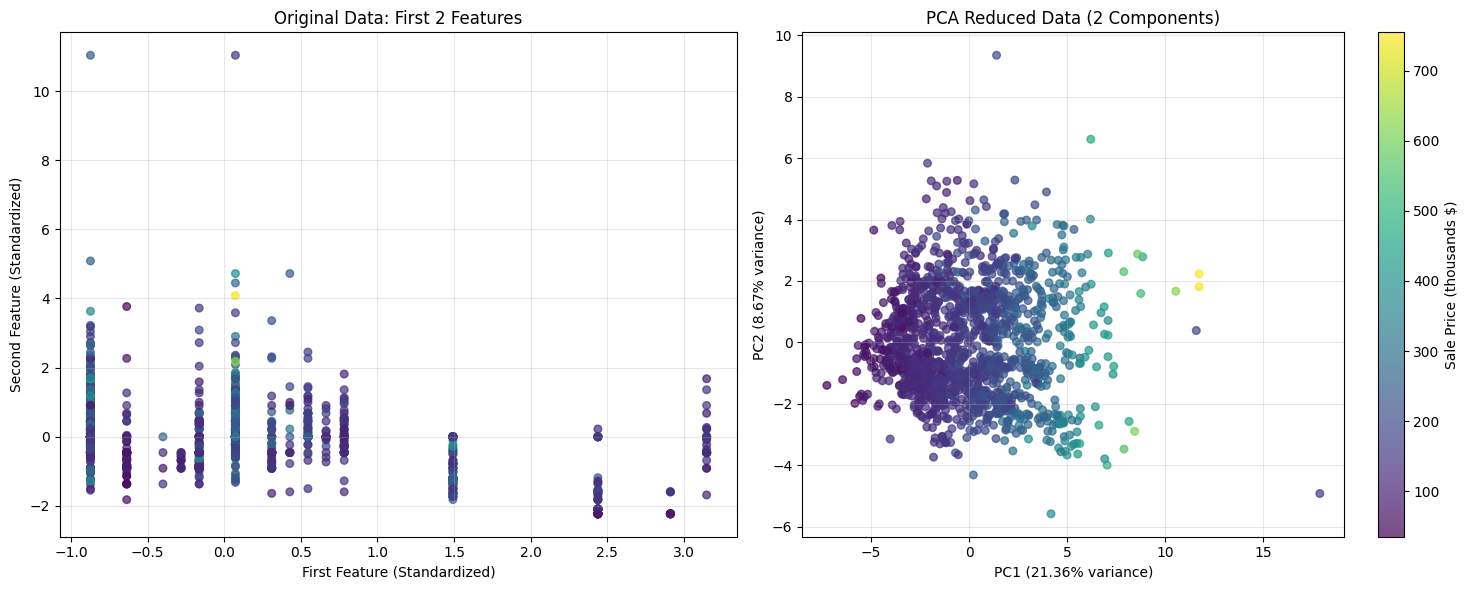

Comparison summary
Original data dimensions: 37
Reduced data dimensions: 2
Data compression: 94.6%
Variance preserved: 30.0%


In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(scaled_data[:, 0], scaled_data[:, 1], c=colors, alpha=0.7, cmap='viridis', s=30)
ax1.set_xlabel('First Feature (Standardized)')
ax1.set_ylabel('Second Feature (Standardized)')
ax1.set_title('Original Data: First 2 Features')
ax1.grid(True, alpha=0.3)

scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, cmap='viridis', s=30)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('PCA Reduced Data (2 Components)')
ax2.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax2, label='Sale Price (thousands $)')
plt.tight_layout()
plt.show()


print("Comparison summary")
print(f"Original data dimensions: {scaled_data.shape[1]}")
print(f"Reduced data dimensions: {X_pca.shape[1]}")
print(f"Data compression: {(1 - X_pca.shape[1] / scaled_data.shape[1]) * 100:.1f}%")
print(f"Variance preserved: {np.sum(pca.explained_variance_ratio_) * 100:.1f}%")

Standardization — приводит все признаки к одному масштабу (среднее = 0, стандартное отклонение = 1).Это важно, иначе признаки с большими значениями будут «доминировать».  
Covariance Matrix — показывает, как связаны признаки между собой.Если ковариация велика — признаки линейно зависимы.  
Eigenvalues и Eigenvectors — определяют направления (векторы) и значимость (значения) новых осей. Чем больше собственное значение, тем больше информации (дисперсии) несёт эта компонента.  
Reduction to 2 Components — мы сохраняем только две главные оси, которые объясняют наибольшую часть разброса данных.  
Plot — показывает, как многомерные данные распределяются в двумерном пространстве. Кластеры на графике могут указывать на схожие дома (по характеристикам).  


3. Supervised Machine Learning

In [28]:
df_2 = df.select_dtypes(include=[np.number]).drop(columns=["Id"], errors="ignore")
df_2 = df_2.fillna(df_2.mean())

df_2["PriceCategory"] = pd.qcut(df_2["SalePrice"], q=3, labels=["Low", "Medium", "High"])

X = df_2.drop(columns=["SalePrice", "PriceCategory"])
y = df_2["PriceCategory"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.3f}")

best_model = max(results, key=results.get)
print("\nBest Model:", best_model)


Logistic Regression: 0.817
kNN: 0.776
Decision Tree: 0.753
SVM: 0.811

Best Model: Logistic Regression


Logistic Regression — простая линейная модель, хорошо работает при чётких разделениях классов.  
kNN — классифицирует по соседям; чувствителен к масштабу и шуму.  
Decision Tree — строит дерево решений, может переобучаться.  
SVM — ищет оптимальную границу между классами, часто даёт высокую точность.

Лучший результат показала Logistic Regression (точность 0.817).
Она превзошла остальные модели, вероятно, потому что зависимость между признаками и целевым классом в этом наборе данных близка к линейной.
Модель SVM показала схожий результат, что подтверждает наличие относительно простых границ между классами.
Decision Tree и kNN немного уступили из-за переобучения и чувствительности к структуре данных.